In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Plot of Sin(x) + Sin(y)

Text(0.5, 1.0, 'Plot of sin(x)+sinx(y)')

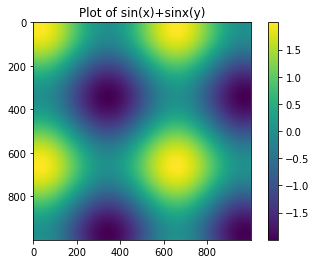

In [2]:
points = np.arange(-5,5,.01)
dx,dy = np.meshgrid(points,points)
z = (np.sin(dx)+np.sin(dy))
plt.imshow(z)
plt.colorbar()
plt.title('Plot of sin(x)+sinx(y)')

Plot For Histogram

(array([ 4.,  4., 14., 13., 20., 25., 11.,  8.,  0.,  1.]),
 array([-2.83674415, -2.20557632, -1.57440849, -0.94324066, -0.31207283,
         0.31909499,  0.95026282,  1.58143065,  2.21259848,  2.84376631,
         3.47493414]),
 <a list of 10 Patch objects>)

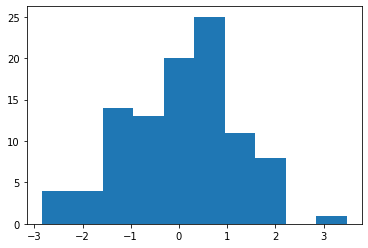

In [3]:
d1 = np.random.randn(100)

plt.hist(d1)

(array([ 2.,  8.,  7.,  8.,  9., 11., 11., 11.,  5.,  8.]),
 array([-1.97405973, -1.58059212, -1.18712452, -0.79365691, -0.4001893 ,
        -0.0067217 ,  0.38674591,  0.78021352,  1.17368112,  1.56714873,
         1.96061634]),
 <a list of 10 Patch objects>)

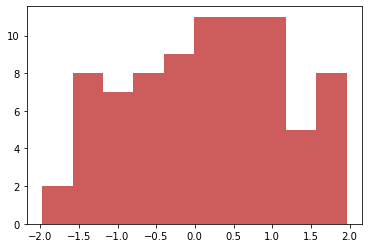

In [5]:
d2 = np.random.randn(80)

plt.hist(d2, color = 'indianred')

(array([0.06353763, 0.06353763, 0.1906129 , 0.31768816, 0.        ,
        0.44476342, 0.1906129 , 0.31768816, 0.25415053, 0.31768816,
        0.25415053, 0.44476342, 0.38122579, 0.31768816, 0.50830106,
        0.1906129 , 0.06353763, 0.25415053, 0.25415053, 0.25415053]),
 array([-1.97405973, -1.77732593, -1.58059212, -1.38385832, -1.18712452,
        -0.99039071, -0.79365691, -0.59692311, -0.4001893 , -0.2034555 ,
        -0.0067217 ,  0.19001211,  0.38674591,  0.58347971,  0.78021352,
         0.97694732,  1.17368112,  1.37041493,  1.56714873,  1.76388253,
         1.96061634]),
 <a list of 20 Patch objects>)

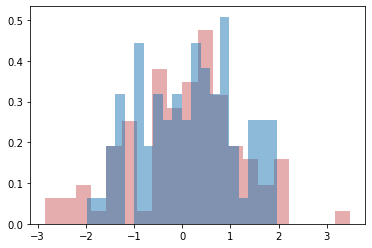

In [8]:
plt.hist(d1, density =True, color ='indianred', bins=20, alpha =0.5)
plt.hist(d2, density= True, bins = 20, alpha =0.5)

#density is to make both plots fit in one area. aplha is for transparency

Trying the same using seaborn

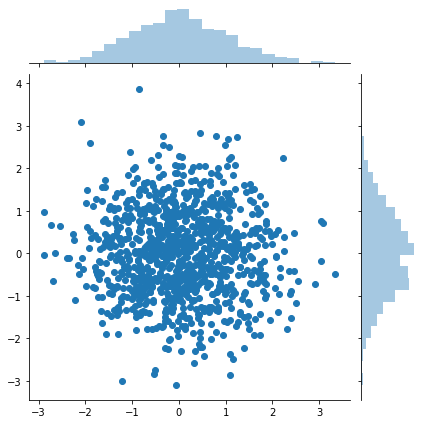

In [10]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

sns.jointplot(data1,data2)
#basic joint plot

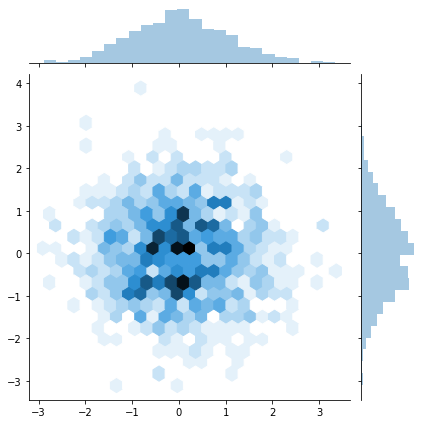

In [11]:
sns.jointplot(data1,data2, kind = 'hex')
#Speciifying the kind of plot

Combining Plot Styles

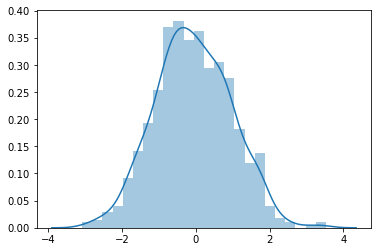

In [14]:
data = np.random.randn(1000)
sns.distplot(data)
# combines kde with histogram

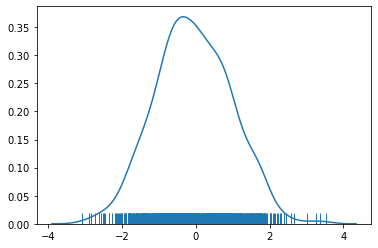

In [16]:
sns.distplot(data, bins =25, rug = True, hist = False )

# Kde with rug and no histogram

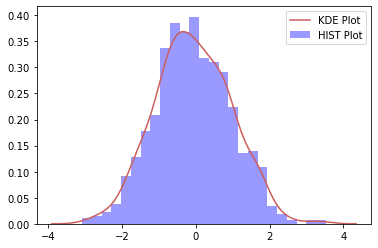

In [22]:
sns.distplot(data, bins = 25, 
             kde_kws= {'color': 'indianred', 'label': 'KDE Plot'},
             hist_kws = {'color': 'blue', 'label': 'HIST Plot'})
# declaring attributes as dictionaries

Box and Violin Plots

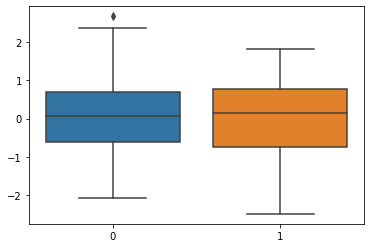

In [34]:
data1 = np.random.randn(100)
data2 = np.random.randn(100)

sns.boxplot( data= [data1, data2], orient = 'v')

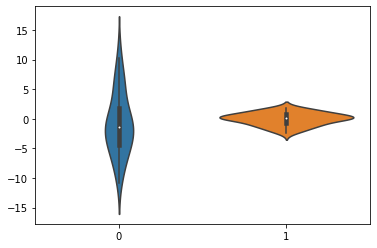

In [41]:

# Combines kde along with a box plot = hence gives the probablity density specifying bandwidth(bw)
sns.violinplot( data= [data1, data2], orient = 'v', bw =0.5)

Regression Plots

In [42]:
tips = sns.load_dataset('tips')

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


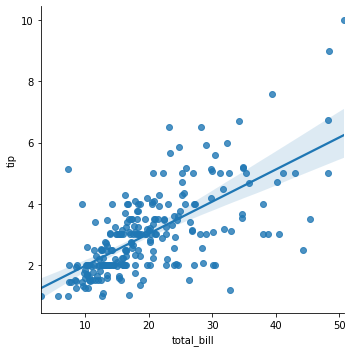

In [45]:
sns.lmplot('total_bill', 'tip', tips)

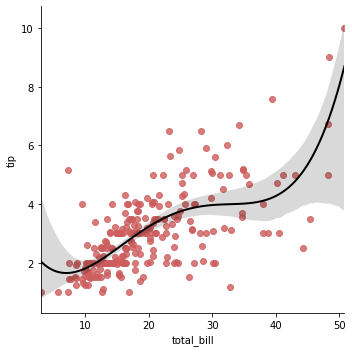

In [51]:
sns.lmplot('total_bill', 'tip', tips, order= 4,
          scatter_kws = {'marker': 'o', 'color': 'indianred'},
          line_kws = {'linewidth': 2 , 'color': 'black'})

# specifying each attribute using dictionaries and order by the number

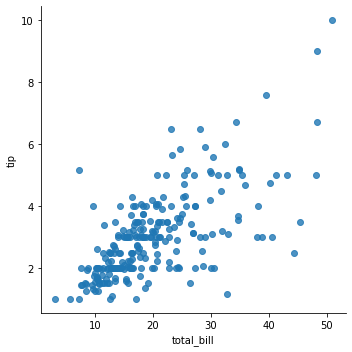

In [56]:
sns.lmplot('total_bill', 'tip', tips, fit_reg = False)

In [59]:
tips['tips_pect'] = 100*(tips['tip']/tips['total_bill'])
tips.head()

#To plot percentage of tip against size of the party

,total_bill,tip,sex,smoker,day,time,size,tips_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


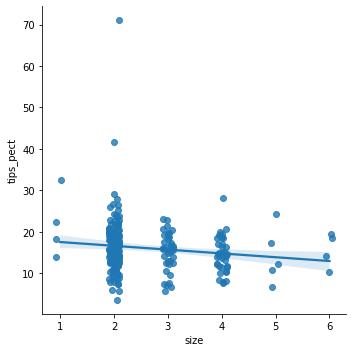

In [60]:
sns.lmplot('size', 'tips_pect', tips, x_jitter =.1)

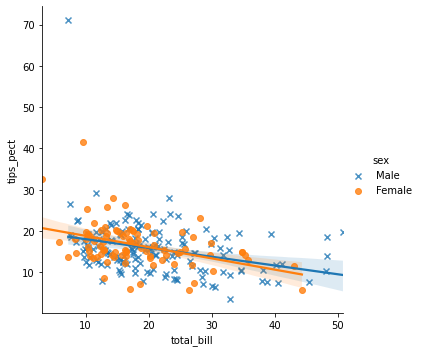

In [64]:
sns.lmplot('total_bill', 'tips_pect', tips, hue ='sex', markers =['x','o'])
#adding markers as column 'sex'

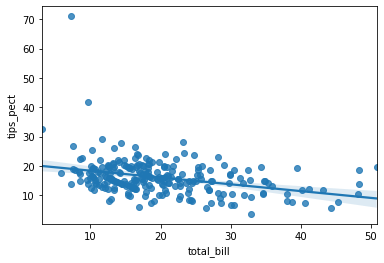

In [65]:
sns.regplot('total_bill', 'tips_pect', tips)
# lower level plot of lmplot - used when it's a part of many plots in a figure

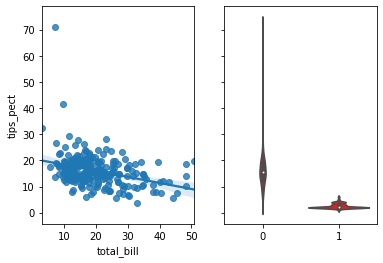

In [72]:
fig , (axis1, axis2) = plt.subplots(1,2,sharey = True)

sns.regplot('total_bill', 'tips_pect', tips, ax = axis1)
sns.violinplot(data = [tips['tips_pect'], tips['size']], color = 'red', ax = axis2)

Clustered Matrices and Heatmaps

In [74]:
flight_dframe = sns.load_dataset('flights')

In [75]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [77]:
flight_dframe= flight_dframe.pivot('month','year', 'passengers')

In [78]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


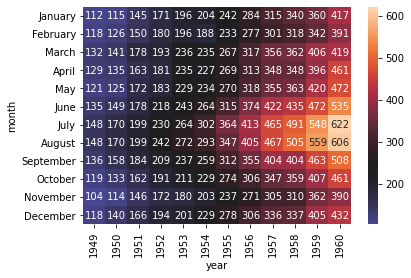

In [81]:
sns.heatmap(flight_dframe, annot =True, fmt='d', center = flight_dframe.loc['January',1955])

In [90]:
yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)

years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)


year_dframe = pd.concat((years, flights), axis =1)
year_dframe.columns = ['Year','Flights']

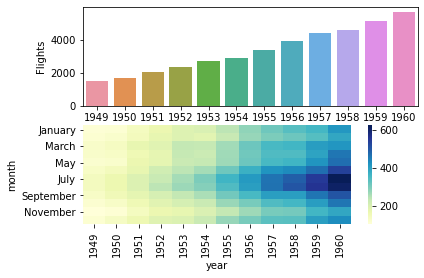

In [98]:
f, (axis1,axis2) = plt.subplots(2,1)

sns.barplot('Year', y ='Flights', data = year_dframe, ax=axis1)
sns.heatmap(flight_dframe, ax=axis2,cmap="YlGnBu")

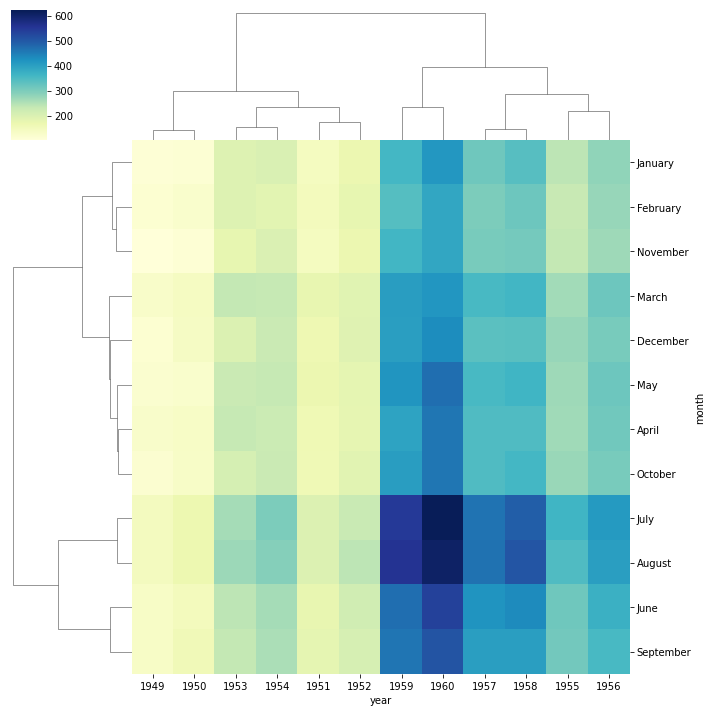

In [100]:
sns.clustermap(flight_dframe, cmap="YlGnBu")

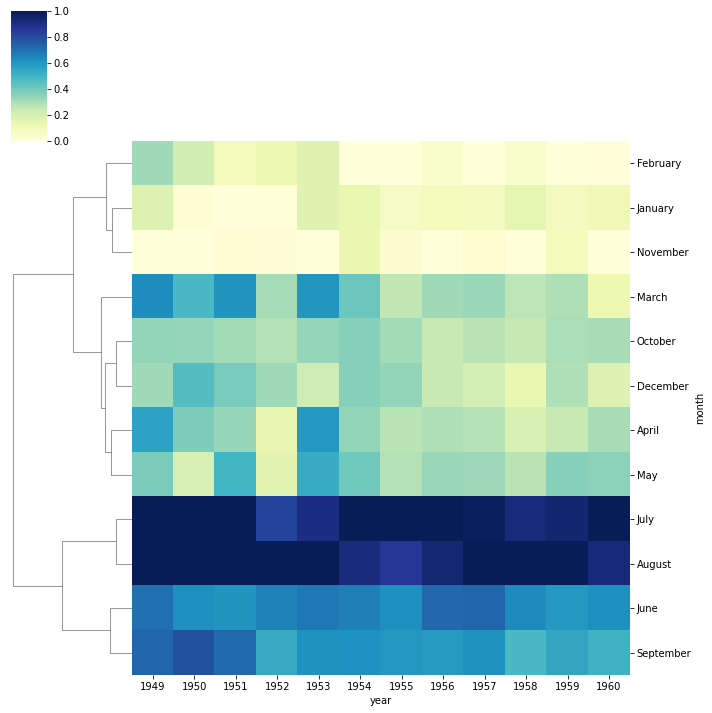

In [102]:
sns.clustermap(flight_dframe, cmap="YlGnBu", col_cluster=False, standard_scale =1)
# clsutering only by rows and standardizing by column 

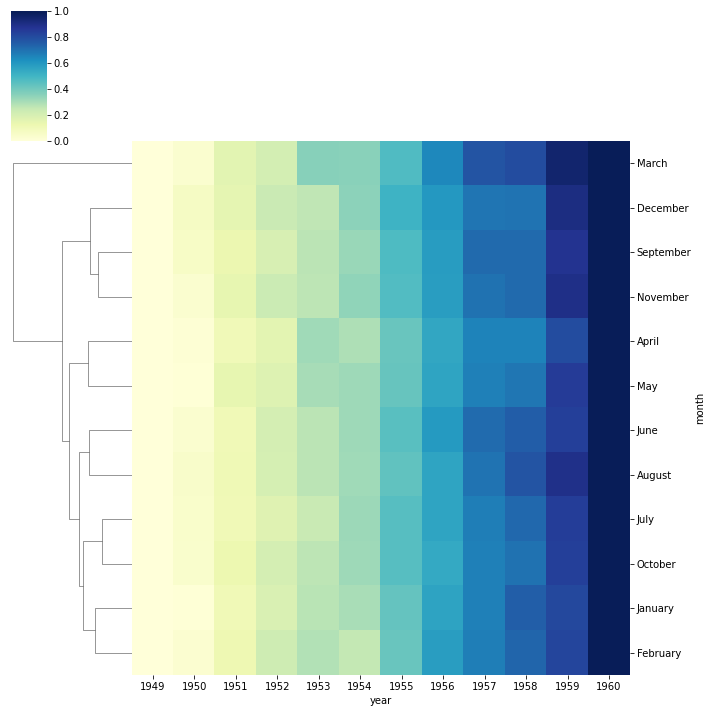

In [103]:
sns.clustermap(flight_dframe, cmap="YlGnBu", col_cluster=False, standard_scale =0)
# clsutering only by rows and standardizing by rows

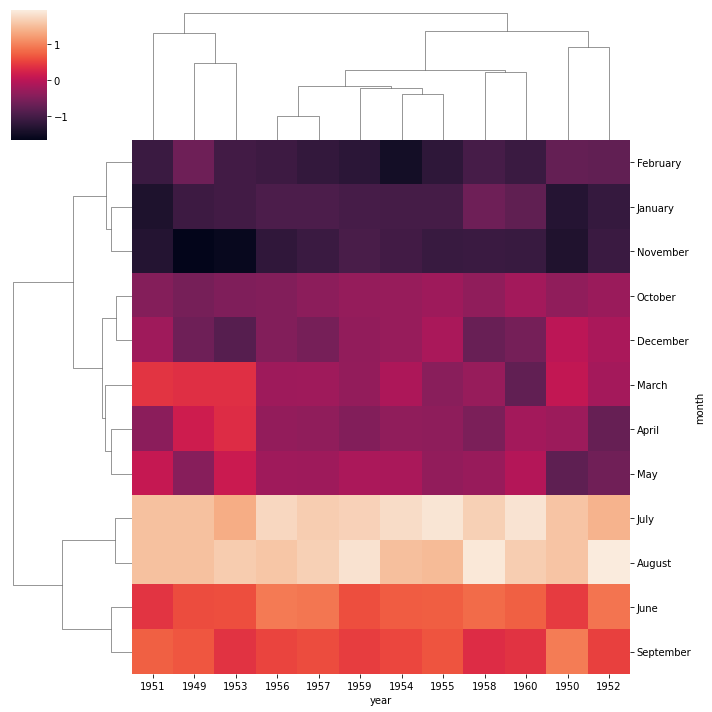

In [105]:
sns.clustermap(flight_dframe, z_score =1)

#standardizing by z score